In [ ]:
pip install turicreate

In [2]:
import turicreate as tc

In [3]:
sales = tc.SFrame.read_csv('/content/drive/My Drive/Philadelphia_Crime_Rate_noNA.csv')
sales

Finished parsing file /content/drive/My Drive/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.030139 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.01457 secs.

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [4]:
tc.show(sales['CrimeRate'],sales['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [5]:
Crime_model = tc.linear_regression.create(sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

In [20]:
Crime_model_diff = tc.boosted_trees_regression.create(sales,target='HousePrice',features=['CrimeRate'],validation_set=None,verbose=False)

In [22]:
Crime_model_diff

Class                          : BoostedTreesRegression

Schema
------
Number of examples             : 99
Number of feature columns      : 1
Number of unpacked features    : 1

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.0092
Training rmse                  : 51295.7816
Training max_error             : 229230.5625

In [6]:
#Crime_model_diff = tc.

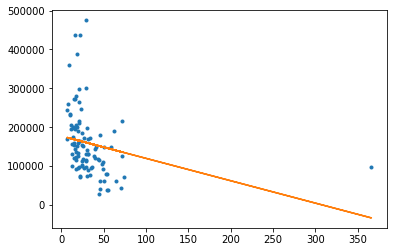

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],Crime_model.predict(sales),'-')

In [8]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]

In [9]:
tc.show(sales_noCC['CrimeRate'],sales_noCC['HousePrice'])

Materializing X axis SArray

Materializing Y axis SArray

In [10]:
Crime_model_noCC = tc.linear_regression.create(sales_noCC,target = 'HousePrice',features = ['CrimeRate'],validation_set = None,verbose=False)

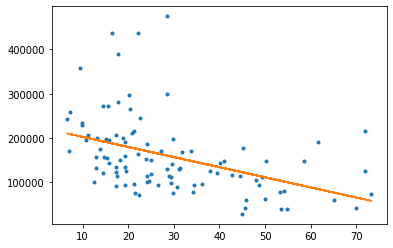

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',sales_noCC['CrimeRate'],Crime_model_noCC.predict(sales_noCC),'-')

In [12]:
Crime_model.coefficients

name,index,value,stderr
(intercept),None,176626.04688088188,11245.588219378818
CrimeRate,None,-576.8049490581088,226.90225950965336


In [13]:
Crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


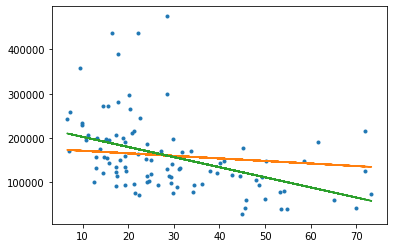

In [14]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
         sales_noCC['CrimeRate'], Crime_model.predict(sales_noCC), '-',
         sales_noCC['CrimeRate'], Crime_model_noCC.predict(sales_noCC), '-')

In [15]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]


In [16]:
Crime_model_nohighend = tc.linear_regression.create(sales_nohighend,target = 'HousePrice', features = ['CrimeRate'],validation_set=None,verbose=False)

In [17]:
Crime_model_noCC.coefficients

name,index,value,stderr
(intercept),None,225204.60430309846,16404.024751386656
CrimeRate,None,-2287.6971744328953,491.53747812308956


In [18]:
Crime_model_nohighend.coefficients

name,index,value,stderr
(intercept),None,199073.5896152513,11932.510110455863
CrimeRate,None,-1837.7128098887245,351.5196093328532


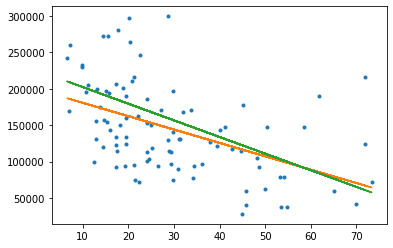

In [19]:
plt.plot(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'], '.',
         sales_nohighend['CrimeRate'], Crime_model_nohighend.predict(sales_nohighend), '-',
         sales_nohighend['CrimeRate'], Crime_model_noCC.predict(sales_nohighend), '-')  